## 在线性回归模型中使用梯度下降法

In [87]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
y=x*3.+4.+np.random.normal(size=100)

In [89]:
X = x.reshape(-1,1)

In [90]:
X.shape

(100, 1)

In [91]:
y.shape

(100,)

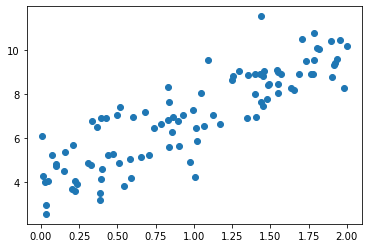

In [92]:
plt.scatter(X,y)

### 使用梯度下降训练

In [93]:
def J(theta, X_b,y):
    try:
        return np.sum((y-X_b.dot(theta))**2)/len(X_b)
    except:
        return float('inf')

In [94]:
def dJ(theta,X_b,y):
    res = np.empty(len(theta))
    res[0] =np.sum(X_b.dot(theta) - y)
    for i in range(1,len(theta)):
        res[i] = (X_b.dot(theta)-y).dot(X_b[:,i])
    
    return res * 2/len(X_b)

In [95]:
def gradient_descent(X_b,y,initial_theta,eta,n_iters=1e4,epsilon =1e-8):
    
    theta = initial_theta
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta,X_b,y)
        last_theta = theta
        theta = theta - eta * gradient
        
        if(abs(J(theta,X_b,y) - J(last_theta,X_b,y))< epsilon):
            break
        
        i_iter += 1
        
    return theta

In [96]:
ones=np.ones((100,1))
X_b=np.hstack([ones,X])
inital_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta=gradient_descent(X_b,y,inital_theta,eta)

In [97]:
theta

array([4.02145786, 3.00706277])

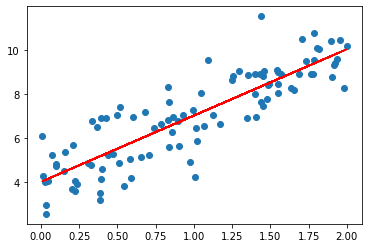

In [98]:
plt.scatter(X,y)
plt.plot(X,X*theta[1]+theta[0],color='r')

### 封装我们的线性回归算法

In [99]:
%run C:\Users\bufanx\PycharmProjects\MachineLearning\PlayML\LinearRegression.py

In [100]:
lin_reg = LinearRegression()

In [101]:
lin_reg.fit_gd(X,y)

LinearRegression()

In [102]:
lin_reg.coef_

array([3.00706277])

In [103]:
lin_reg.interception_

4.021457858204859

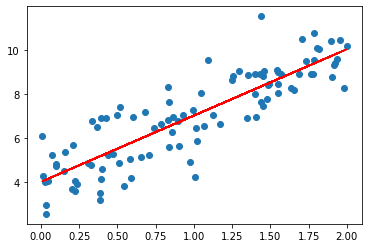

In [104]:
plt.scatter(X,y)
plt.plot(X,X*lin_reg.coef_+lin_reg.interception_,color='r')

## 随机梯度下降法

In [105]:
def dJ_sgd(theta,X_b_i,y_i):
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i) * 2. 

In [121]:
def sgd(X_b,y,initial_theta,n_iters):
    
    t0=5
    t1=50
    
    def learning_rate(t):
        return t0/(t+t1)
    
    theta = initial_theta
    
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta,X_b[rand_i],y[rand_i])
        theta =theta - learning_rate(cur_iter)*gradient
        
    return theta

In [122]:
%time
inital_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b,y,inital_theta,n_iters=len(X_b)//3)

Wall time: 0 ns


In [123]:
theta

array([3.73727298, 3.55521028])